In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
from brutto_generator import brutto_gen

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


#### Assign brutto formulas by default gdf

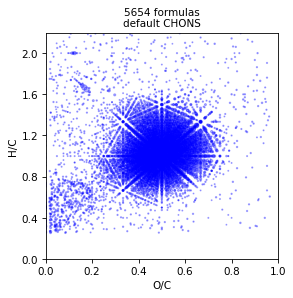

In [2]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec = spec.assign()
vk = VanKrevelen(spec.table, name='default CHONS')
vk.draw_scatter()

#### Assign brutto formulas by custom gdf

For main isotope just it simple. For example, C, H, N, O, Na. It automaticaly take most abudant isotope.
For minor isotopes it is necessery mark isotope with "_". For example, C_13, H_2, Fe_57
Then, after element it is necessary mark range in what it can be in compound. 
For example 
'C':(1,40) means that in compouns it may be from 1 to 39 carbon atoms. 
'H_2':(0:10) means tha in compound it may be from 0 to 9 deterium atoms

In [3]:
gdf = brutto_gen(elems={'C':(1,40),'C_13':(0,10),'H':(0,100), 'O':(0,40),'N':(0,2), 'Fe':(0,2)})
gdf

,C,C_13,H,O,N,Fe,mass
0,1,0,2,0,0,0,14.015650
1,2,0,2,0,0,0,26.015650
2,1,0,1,0,1,0,27.010899
3,1,1,2,0,0,0,27.019005
4,2,0,4,0,0,0,28.031300
...,...,...,...,...,...,...,...
797795,39,9,77,38,1,1,1340.377506
797796,39,9,79,38,1,1,1342.393156
797797,39,9,81,38,1,1,1344.408806
797798,39,9,83,38,1,1,1346.424456


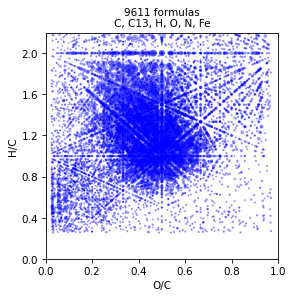

In [4]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )
spec = spec.assign(generated_bruttos_table=gdf)
vk = VanKrevelen(spec.table, name='C, C13, H, O, N, Fe')
vk.draw_scatter()

In [5]:
spec.table

,mass,intensity,assign,C,C_13,H,O,N,Fe,numbers,O/C,H/C,volume,color
0,203.25919,3661610,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.726605,blue
1,203.46156,3526881,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.699869,blue
2,203.59241,3360136,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.666781,blue
3,203.70255,3969624,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.787727,blue
4,204.07180,4046587,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.802999,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21911,999.54842,9650198,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.914972,blue
21912,999.58978,8460309,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.678852,blue
21913,999.72472,10602515,False,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.103948,blue
21914,999.88129,9754642,True,33.0,2.0,13.0,31.0,1.0,1.0,1,0.939394,0.393939,1.935698,blue
